## You will be using the dataset us_retail_sales.csv for this assignment. This data gives the total monthly retail sales in the US from January 1992 until June 2021. With this dataset, complete the following steps:

In [4]:
# Import csv file as dataframe
sales <- read.csv("us_retail_sales.csv")

In [22]:
# Import libraries
library(readr)
library(zoo)
library(ggplot2)
library(tidyverse)
install.packages("reshape")
library(reshape)
library(scales)

Installing package into 'C:/Users/kadams/OneDrive - Suncor Energy Inc/Documents 1/R/win-library/3.6'
(as 'lib' is unspecified)



  There is a binary version available but the source version is later:
        binary source needs_compilation
reshape  0.8.8  0.8.9              TRUE

  Binaries will be installed


Warning message:
"package 'reshape' is in use and will not be installed"

In [12]:
# melting data to take a matrix and change it into a long dataframe
sales.long<-melt(sales, id="YEAR")

In [13]:
# taking uppercase months and matchig them to a format that R can understand
sales.long$variable<-match(sales.long$variable, toupper(month.abb))

### Plot the data with proper labeling and make some observations on the graph.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'
Warning message:
"Removed 6 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 6 rows containing missing values (geom_point)."

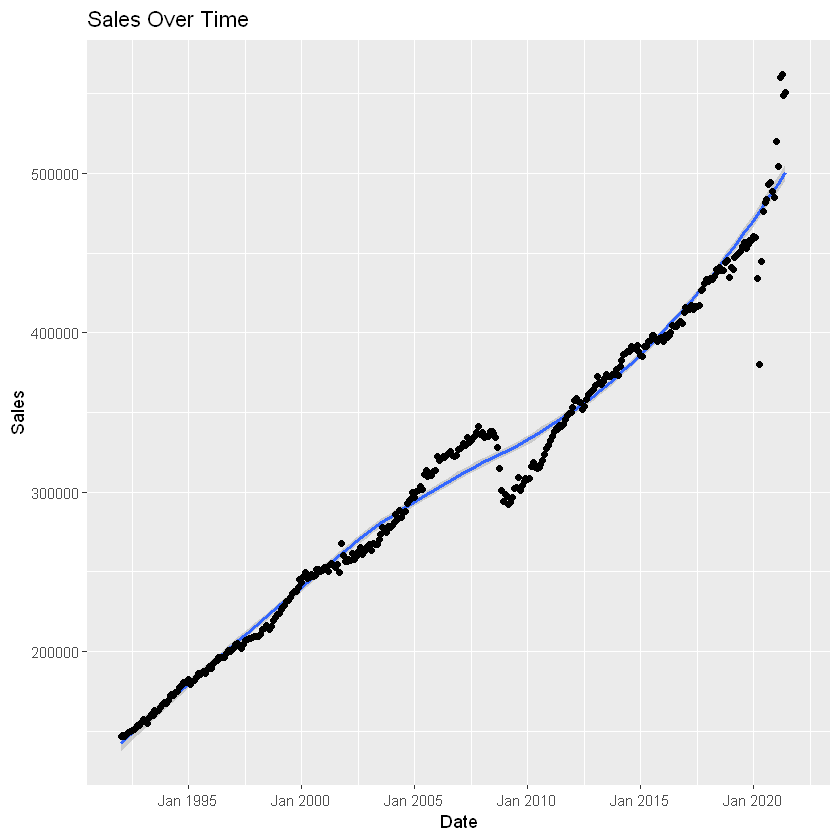

In [30]:
# requires the scales library
require(scales)
# reformatted Y axis to get rid of scientific notation
sales.long$Date <- as.yearmon(paste(sales.long$YEAR, sales.long$variable), "%Y %m")
options(scipen=10000)
# Create time series chart with smooth and points of data
ggplot(sales.long, aes(x=Date, y=value)) + geom_smooth() + geom_point() + labs(title="Sales Over Time", y="Sales", x="Date")

### Observations: 2007-2009 there seems to be some deviation from the smooth line. After some googling, this was the time period of the Great Regression/Financial Mortgage crisis. And then, there is some devision from the blue line in 2020 which correlates to the COVID-19 pandemic. 

### Split this data into a training and test set. Use the last year of data (July 2020 – June 2021) of data as your test set and the rest as your training set.

In [15]:
# Test Set
test.sales<- sales.long %>% filter(Date >= "July 2020" & Date <= "June 2021" )
# Train Set
train.sales<- sales.long %>% filter(Date <= "July 2020" | Date >= "June 2021" )

### Use the training set to build a predictive model for the monthly retail sales.

In [19]:
# Using linear model to train the training set
train.lm<-lm(value~Date, data=train.sales)
summary(train.lm)


Call:
lm(formula = value ~ Date, data = train.sales)

Residuals:
   Min     1Q Median     3Q    Max 
-68398  -4653   -518   7623  90178 

Coefficients:
                Estimate   Std. Error t value            Pr(>|t|)    
(Intercept) -20874977.45    179136.88  -116.5 <0.0000000000000002 ***
Date            10554.77        89.29   118.2 <0.0000000000000002 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 13710 on 342 degrees of freedom
  (6 observations deleted due to missingness)
Multiple R-squared:  0.9761,	Adjusted R-squared:  0.976 
F-statistic: 1.397e+04 on 1 and 342 DF,  p-value: < 0.00000000000000022


### Use the model to predict the monthly retail sales on the last year of data.

In [27]:
# Use predict to predict the monthly retail sales on the last year of data using the linear model with training data and the test set
predict(train.lm, test.sales)
## The values below represent the predict monthly retail sales for July 2020 – June 2021


1        2        3        4        5        6        7        8 
456206.2 457085.7 457965.3 458844.8 459724.4 460604.0 450928.8 451808.3 
       9       10       11       12 
452687.9 453567.5 454447.0 455326.6

### Report the RMSE of the model predictions on the test set.

In [18]:
# Make a variable for the coding used above (test.sales$predicted)
test.sales$predicted<-predict(train.lm, test.sales)
# Find the RMSE which is the square root of the mean of test sales value minus the predict test sales values
sqrt(mean((test.sales$value-test.sales$predicted)^2))

[1] 59426.5

### The RMSE is an indication of how close the predictions are to the actual values. It is the standard deviation of the residuals. 

In [29]:
sd(test.sales$value)

[1] 32231.22